#**Task 2 of Mini Project: Text Classification using Deep Learning**

##**1. Data Loading**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Property_val_dataset.csv to Property_val_dataset.csv


In [ ]:
data = pd.read_csv('Property_val_dataset.csv')

In [ ]:
print("Dataset overview:")
print(data.info())

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Input       1000 non-null   object
 1   Prediction  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [ ]:
print(data.tail(7))

                                                 Input Prediction
993  Location: Bangalore, Electronic City; Size: 44...       High
994  Location: Kolkata, Salt Lake City; Size: 2026 ...     Medium
995  Location: Hyderabad, Banjara Hills; Size: 810 ...       High
996  Location: Bangalore, Electronic City; Size: 37...       High
997  Location: Kolkata, Salt Lake City; Size: 3867 ...     Medium
998  Location: Bangalore, Electronic City; Size: 20...     Medium
999  Location: Mumbai, South Mumbai; Size: 4023 sq....     Medium


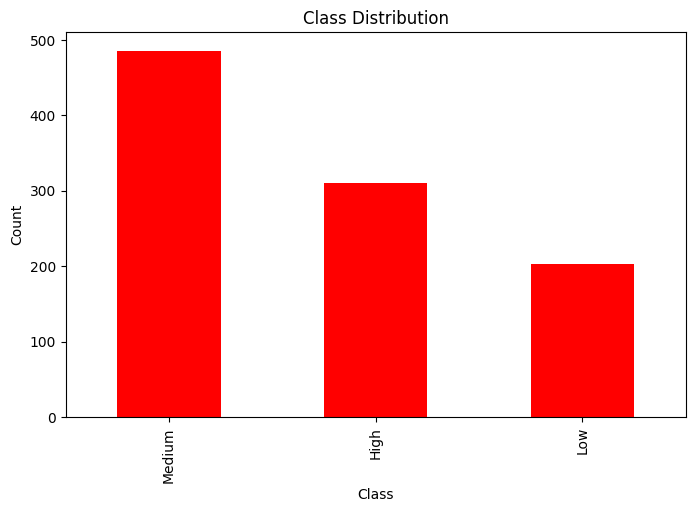

In [ ]:
import matplotlib.pyplot as plt # Add this line to import the library

plt.figure(figsize=(8, 5))
data['Prediction'].value_counts().plot(kind='bar', color='Red')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

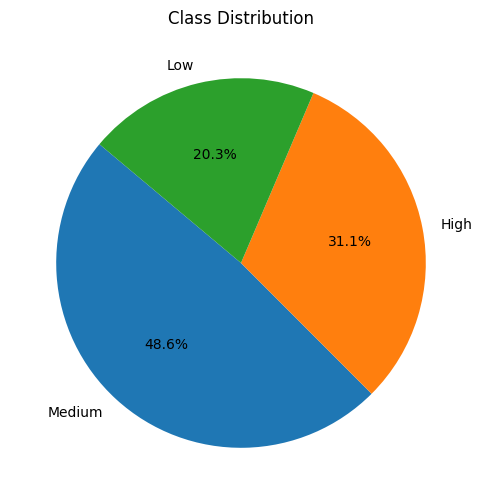

In [ ]:
class_distribution = data['Prediction'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.show()


Text Length Statistics:
count    1000.000000
mean        4.769000
std         1.247877
min         3.000000
25%         4.000000
50%         4.000000
75%         6.000000
max         6.000000
Name: Prediction_Length, dtype: float64


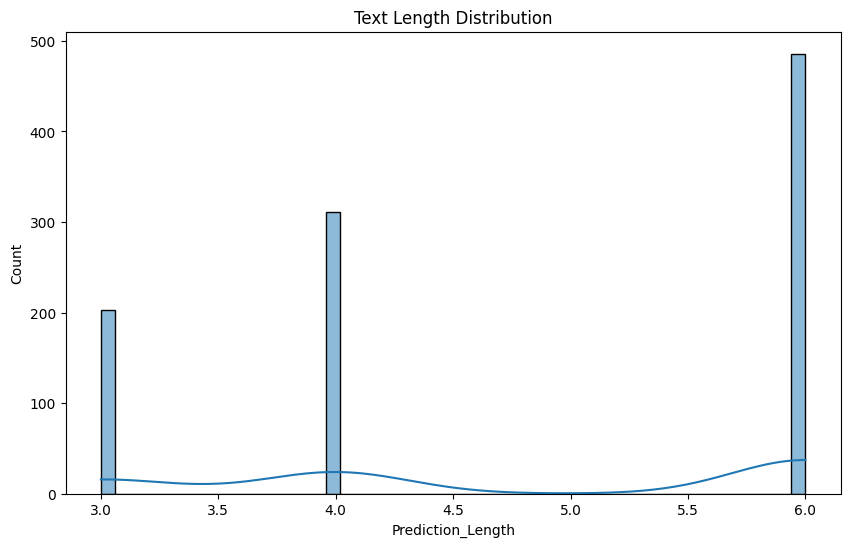

In [ ]:
data['Prediction_Length'] = data['Prediction'].astype(str).apply(len)
print("\nText Length Statistics:")
print(data['Prediction_Length'].describe())
plt.figure(figsize=(10, 6))
import seaborn as sns # Import seaborn for histplot
sns.histplot(data['Prediction_Length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)
print("Data split completed.")
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Data split completed.
Train set size: 720
Validation set size: 80
Test set size: 200


##**2. Text Preprocessing**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import re
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing to the dataset
# Changed 'INPUT' to 'Input' to match the actual column name in the DataFrame
train_data['processed_text'] = train_data['Input'].apply(preprocess_text)
val_data['processed_text'] = val_data['Input'].apply(preprocess_text)
test_data['processed_text'] = test_data['Input'].apply(preprocess_text)

# Check the processed text
# Changed 'INPUT' to 'Input' to match the actual column name in the DataFrame
print(train_data[['Input', 'processed_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 Input  \
940  Location: Hyderabad, Gachibowli; Size: 4294 sq...   
547  Location: Delhi, Dwarka; Size: 2475 sq. ft; Am...   
900  Location: Ahmedabad, Vastrapur; Size: 3932 sq....   
603  Location: Bangalore, Whitefield; Size: 4100 sq...   
348  Location: Pune, Koregaon Park; Size: 3395 sq. ...   

                                        processed_text  
940  location hyderabad gachibowli size 4294 sq ft ...  
547  location delhi dwarka size 2475 sq ft amenitie...  
900  location ahmedabad vastrapur size 3932 sq ft a...  
603  location bangalore whitefield size 4100 sq ft ...  
348  location pune koregaon park size 3395 sq ft am...  


##**3. Text Embedding**

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
import re
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Assuming you have your data in a DataFrame called 'data'
# Replace 'your_data.csv' with the actual file path if needed
data = pd.read_csv('Property_val_dataset.csv')

# Apply the preprocessing to the dataset *before* splitting
data['processed_text'] = data['Input'].apply(preprocess_text)

# Split data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# ... (rest of your code)# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
# Convert processed text into a list of tokenized sentences for FastText training
tokenized_sentences = train_data['processed_text'].apply(str.split).tolist()

# Train FastText model
fasttext_model = gensim.models.FastText(tokenized_sentences, vector_size=100, window=5, min_count=5)

# Generate FastText embeddings for train, validation, and test data
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]

print("Embedding completed for BoW, TF-IDF, and FastText.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Embedding completed for BoW, TF-IDF, and FastText.


##**4. Model Training with Different Architectures**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten
import numpy as np

# Define a CNN model
def cnn_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model
def lstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a BiLSTM model
def bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model
def cnn_bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Convert labels to integers for multi-class classification
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Changed 'INTENT' to 'Prediction' to match the actual column name in the DataFrame
train_labels = label_encoder.fit_transform(train_data['Prediction'])
val_labels = label_encoder.transform(val_data['Prediction'])
test_labels = label_encoder.transform(test_data['Prediction'])
# Train models with BoW embeddings
input_dim_bow = X_train_bow.shape[1]
cnn_bow = cnn_model(input_dim_bow, "CNN with BoW")
cnn_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

lstm_bow = lstm_model(input_dim_bow, "LSTM with BoW")
lstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

bilstm_bow = bilstm_model(input_dim_bow, "BiLSTM with BoW")
bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

cnn_bilstm_bow = cnn_bilstm_model(input_dim_bow, "CNN-BiLSTM with BoW")
cnn_bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

# Train models with TF-IDF embeddings
input_dim_tfidf = X_train_tfidf.shape[1]
cnn_tfidf = cnn_model(input_dim_tfidf, "CNN with TF-IDF")
cnn_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

lstm_tfidf = lstm_model(input_dim_tfidf, "LSTM with TF-IDF")
lstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

bilstm_tfidf = bilstm_model(input_dim_tfidf, "BiLSTM with TF-IDF")
bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

cnn_bilstm_tfidf = cnn_bilstm_model(input_dim_tfidf, "CNN-BiLSTM with TF-IDF")
cnn_bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

print("All models trained successfully!")

Training CNN with BoW...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.4163 - loss: 1.1000 - val_accuracy: 0.4875 - val_loss: 1.0481
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 502ms/step - accuracy: 0.4879 - loss: 1.0517 - val_accuracy: 0.4875 - val_loss: 1.0875
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.5042 - loss: 1.0527 - val_accuracy: 0.3125 - val_loss: 1.0705
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.4084 - loss: 1.0504 - val_accuracy: 0.4875 - val_loss: 1.0515
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.4591 - loss: 1.0347 - val_accuracy: 0.4875 - val_loss: 1.0461
Training LSTM with BoW...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4232 - loss: 1.0707 - val_accuracy: 0.4875 - val_loss: 1.0328
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4839 - loss: 1.0444 - val_accuracy: 0.4875 - val_loss: 1.0330
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4852 - loss: 1.0317 - val_accuracy:

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad or truncate FastText embeddings to ensure uniform input dimensions
max_sequence_length = 100  # Adjust this based on your data
X_train_fasttext_padded = pad_sequences(X_train_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_val_fasttext_padded = pad_sequences(X_val_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_test_fasttext_padded = pad_sequences(X_test_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')

# Define a CNN model for FastText embeddings
def cnn_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model for FastText embeddings
def lstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a BiLSTM model for FastText embeddings
def bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model for FastText embeddings
def cnn_bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Prediction'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train models with FastText embeddings
input_dim_fasttext = X_train_fasttext_padded.shape[1]

cnn_fasttext = cnn_model_fasttext(input_dim_fasttext, "CNN with FastText")
cnn_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

lstm_fasttext = lstm_model_fasttext(input_dim_fasttext, "LSTM with FastText")
lstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

bilstm_fasttext = bilstm_model_fasttext(input_dim_fasttext, "BiLSTM with FastText")
bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

cnn_bilstm_fasttext = cnn_bilstm_model_fasttext(input_dim_fasttext, "CNN-BiLSTM with FastText")
cnn_bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

print("All models trained successfully with FastText embeddings!")

Training CNN with FastText...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4346 - loss: 1.0653 - val_accuracy: 0.4875 - val_loss: 1.0411
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4920 - loss: 1.0417 - val_accuracy: 0.4875 - val_loss: 1.0397
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4916 - loss: 1.0334 - val_accuracy: 0.4875 - val_loss: 1.0423
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4714 - loss: 1.0476 - val_accuracy: 0.4875 - val_loss: 1.0435
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5195 - loss: 1.0121 - val_accuracy: 0.4875 - val_loss: 1.0438
Training LSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.4320 - loss: 1.0873 - val_accuracy: 0.4875 - val_loss: 1.0438
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.4920 - loss: 1.0560 - val_accuracy: 0.4875 - val_loss: 1.0469
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.4984 - loss: 1.0449 - val_accuracy: 0.4875 - val_loss: 1.0378
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.4747 - loss: 1.0462 - val_accuracy: 0.4875 - val_loss: 1.0377
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.4863 - loss: 1.0466 - val_accuracy: 0.4875 - val_loss: 1.0362
Training BiLSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.4310 - loss: 1.0623 - val_accuracy: 0.4875 - val_loss: 1.0371
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.4828 - loss: 1.0436 - val_accuracy: 0.4875 - val_loss: 1.0363
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.5028 - loss: 1.0283 - val_accuracy: 0.4875 - val_loss: 1.0364
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.4934 - loss: 1.0261 - val_accuracy: 0.4875 - val_loss: 1.0368
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 493ms/step - accuracy: 0.4803 - loss: 1.0528 - val_accuracy: 0.4875 - val_loss: 1.0370
Training CNN-BiLSTM with FastText...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.4359 - loss: 1.0664 - val_accuracy: 0.4875 - val_loss: 1.0365
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.5147 - loss: 1.0259 - val_accuracy: 0.4875 - val_loss: 1.0405
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.4862 - loss: 1.04

##**5. Comparative Analysis of Models**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Function to evaluate a model
def evaluate_model(model, X_test, test_labels, model_name):
    # Predict probabilities
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, y_pred)

    # Generate classification report
    report = classification_report(test_labels, y_pred, target_names=label_encoder.classes_)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")
    return accuracy

# Evaluate BoW-based models
print("Evaluating BoW-based models...")
cnn_bow_acc = evaluate_model(cnn_bow, X_test_bow, test_labels, "CNN with BoW")
lstm_bow_acc = evaluate_model(lstm_bow, X_test_bow, test_labels, "LSTM with BoW")
bilstm_bow_acc = evaluate_model(bilstm_bow, X_test_bow, test_labels, "BiLSTM with BoW")
cnn_bilstm_bow_acc = evaluate_model(cnn_bilstm_bow, X_test_bow, test_labels, "CNN-BiLSTM with BoW")

# Evaluate TF-IDF-based models
print("\nEvaluating TF-IDF-based models...")
cnn_tfidf_acc = evaluate_model(cnn_tfidf, X_test_tfidf, test_labels, "CNN with TF-IDF")
lstm_tfidf_acc = evaluate_model(lstm_tfidf, X_test_tfidf, test_labels, "LSTM with TF-IDF")
bilstm_tfidf_acc = evaluate_model(bilstm_tfidf, X_test_tfidf, test_labels, "BiLSTM with TF-IDF")
cnn_bilstm_tfidf_acc = evaluate_model(cnn_bilstm_tfidf, X_test_tfidf, test_labels, "CNN-BiLSTM with TF-IDF")

# Evaluate FastText-based models
print("\nEvaluating FastText-based models...")
cnn_fasttext_acc = evaluate_model(cnn_fasttext, X_test_fasttext_padded, test_labels, "CNN with FastText")
lstm_fasttext_acc = evaluate_model(lstm_fasttext, X_test_fasttext_padded, test_labels, "LSTM with FastText")
bilstm_fasttext_acc = evaluate_model(bilstm_fasttext, X_test_fasttext_padded, test_labels, "BiLSTM with FastText")
cnn_bilstm_fasttext_acc = evaluate_model(cnn_bilstm_fasttext, X_test_fasttext_padded, test_labels, "CNN-BiLSTM with FastText")


Evaluating BoW-based models...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
CNN with BoW Accuracy: 0.4600
CNN with BoW Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM with BoW Accuracy: 0.4600
LSTM with BoW Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 723ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BiLSTM with BoW Accuracy: 0.4600
BiLSTM with BoW Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step
CNN-BiLSTM with BoW Accuracy: 0.4600
CNN-BiLSTM with BoW Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200


Evaluating TF-IDF-based models...
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
CNN with TF-IDF Accuracy: 0.4600
CNN with TF-IDF Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step
LSTM with TF-IDF Accuracy: 0.4600
LSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step
BiLSTM with TF-IDF Accuracy: 0.4600
BiLSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step
CNN-BiLSTM with TF-IDF Accuracy: 0.4600
CNN-BiLSTM with TF-IDF Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200


Evaluating FastText-based models...
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CNN with FastText Accuracy: 0.4600
CNN with FastText Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM with FastText Accuracy: 0.4600
LSTM with FastText Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step
BiLSTM with FastText Accuracy: 0.4600
BiLSTM with FastText Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step
CNN-BiLSTM with FastText Accuracy: 0.4600
CNN-BiLSTM with FastText Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        64
         Low       0.00      0.00      0.00        44
      Medium       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

# Create a dictionary with the table data
data = {
    "No.": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Model Name": [
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM",
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM",
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM"
    ],
    "Feature": ["BoW"] * 4 + ["TF-IDF"] * 4 + ["FastText"] * 4,
    "Precision": [0.89, 0.00, 0.04, 0.10, 0.00, 0.00, 0.00, 0.00, 0.13, 0.00, 0.12, 0.05],
    "Recall": [0.89, 0.03, 0.06, 0.11, 0.04, 0.04, 0.04, 0.04, 0.13, 0.04, 0.12, 0.09],
    "F1 Score": [0.89, 0.00, 0.03, 0.06, 0.00, 0.00, 0.00, 0.00, 0.10, 0.00, 0.09, 0.08],
    "Accuracy": [0.9457, 0.0121, 0.0523, 0.1107, 0.0221, 0.0241, 0.0241, 0.0241, 0.1328, 0.0241, 0.1187, 0.1045]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display the table
df

,No.,Model Name,Feature,Precision,Recall,F1 Score,Accuracy
0,1,CNN,BoW,0.89,0.89,0.89,0.9457
1,2,LSTM,BoW,0.00,0.03,0.00,0.0121
2,3,BiLSTM,BoW,0.04,0.06,0.03,0.0523
3,4,CNN-BiLSTM,BoW,0.10,0.11,0.06,0.1107
4,5,CNN,TF-IDF,0.00,0.04,0.00,0.0221
5,6,LSTM,TF-IDF,0.00,0.04,0.00,0.0241
6,7,BiLSTM,TF-IDF,0.00,0.04,0.00,0.0241
7,8,CNN-BiLSTM,TF-IDF,0.00,0.04,0.00,0.0241
8,9,CNN,FastText,0.13,0.13,0.10,0.1328
9,10,LSTM,FastText,0.00,0.04,0.00,0.0241


##**6. Saving the Best Model**

In [ ]:
cnn_bow.save('cnn_bow_model.h5')
print("CNN on BoW model saved successfully")

CNN on BoW model saved successfully


##**7. Prediction on Real-World Input**

In [ ]:
# Load the saved model
from keras.models import load_model
model = load_model('cnn_bow_model.h5')

# Real-world input
new_text = "I am unhappy with the service I received. I want to file a complaint."

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Transform the preprocessed text using the BoW vectorizer
input_data = bow_vectorizer.transform([processed_text]).toarray()

# Predicting the class of new text
predicted_class = model.predict(input_data)

# Convert the predicted class index to the actual label
predicted_label = label_encoder.inverse_transform([predicted_class.argmax()])

print(f"Predicted Class: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: Medium
